<a href="https://colab.research.google.com/github/SergioManuelJob/WeatherDataset/blob/master/Weather_Sergio_Manuel_Suarez_Suarez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sergio Manuel Suarez Suarez

Dataset comes from: https://www.kaggle.com/datasets/budincsevity/szeged-weather

### Variables:

- time
- summary
- precipType
- temperature
- apparentTemperature
- humidity
- windSpeed
- windBearing
- visibility
- loudCover
- pressure

In [163]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [166]:
df = pd.read_csv('https://raw.githubusercontent.com/SergioManuelJob/data/master/weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [148]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [132]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [167]:
df.dropna(inplace=True, axis=0)
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [134]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

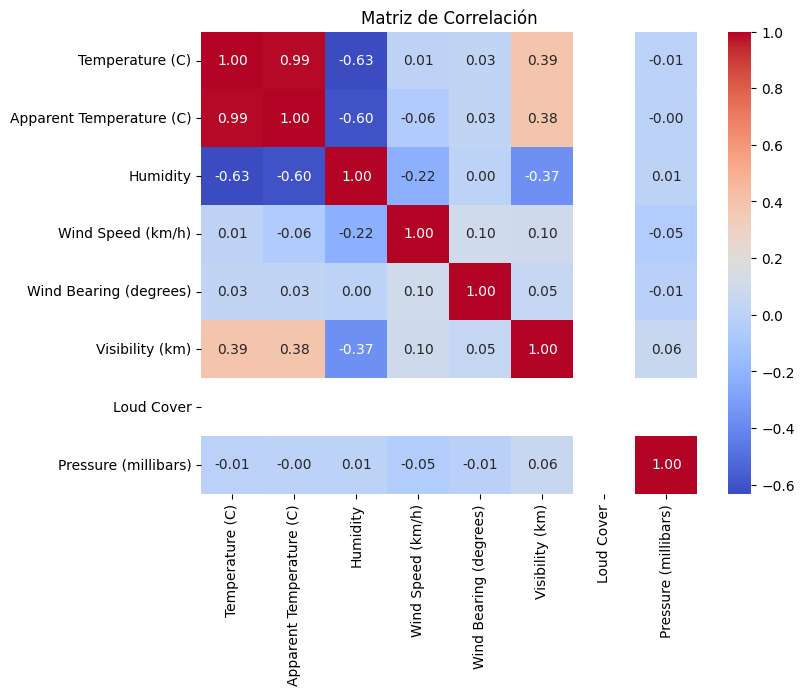

In [135]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

In [168]:
# Loud cover is a column filled with only 0, it is not useful
df = df.drop('Loud Cover', axis=1)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [169]:
# Now between apparent temperature and temperature, as they are highly correlated I will keep what seems more logical to me, temperature, as it is the most objective and doesn't depend on subjective opinions
df = df.drop('Apparent Temperature (C)', axis=1)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


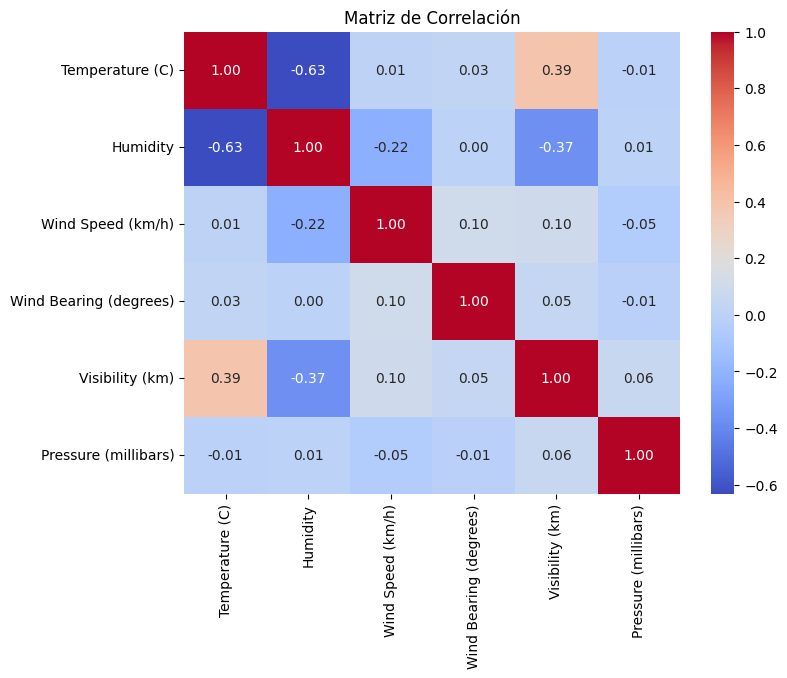

In [119]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

In [170]:
df['Summary'].value_counts()

Partly Cloudy                          31635
Mostly Cloudy                          27914
Overcast                               16516
Clear                                  10763
Foggy                                   7117
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [153]:
# Daily summary is a column filled with 214 different categories, I don't think this will be useful as it's correlated to Summary also
df['Daily Summary'].unique()

array(['Partly cloudy throughout the day.',
       'Mostly cloudy throughout the day.', 'Foggy in the evening.',
       'Foggy overnight and breezy in the morning.',
       'Overcast throughout the day.', 'Partly cloudy until night.',
       'Mostly cloudy until night.',
       'Foggy starting overnight continuing until morning.',
       'Foggy in the morning.', 'Partly cloudy until evening.',
       'Partly cloudy starting in the morning.',
       'Mostly cloudy starting overnight continuing until night.',
       'Mostly cloudy until evening.',
       'Partly cloudy starting in the morning continuing until evening.',
       'Partly cloudy starting in the afternoon.',
       'Partly cloudy starting overnight.',
       'Partly cloudy until morning.',
       'Partly cloudy starting overnight continuing until night.',
       'Partly cloudy starting in the afternoon continuing until night.',
       'Mostly cloudy starting overnight.',
       'Partly cloudy until afternoon.',
       'Mostly

In [96]:
df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [171]:
df = df.drop('Daily Summary', axis=1)
df

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [172]:
# And lastly, I think that the formatted date column is not useful as it serves as an ID.
df = df.drop('Formatted Date', axis=1)
df

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [173]:
# Im going to categorize Precip Type
df['Summary'] = pd.factorize(df['Summary'], sort=True)[0] + 1
df['Precip Type'] = pd.factorize(df['Precip Type'], sort=True)[0] + 1
df

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,20,1,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,20,1,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,18,1,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,20,1,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,18,1,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,20,1,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,20,1,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,20,1,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,20,1,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [142]:
df.describe()

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000
mean,1.111658,11.940976,0.734841,10.804936,187.518773,10.362402,1003.150038
std,0.314947,9.570671,0.195724,6.920727,107.385351,4.173780,117.276976
min,1.000000,-21.822222,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.604167,0.600000,5.796000,116.000000,8.372000,1011.890000
50%,1.000000,12.033333,0.780000,9.933700,180.000000,10.046400,1016.420000
75%,1.000000,18.844444,0.890000,14.135800,290.000000,14.812000,1021.050000
max,2.000000,39.905556,1.000000,63.852600,359.000000,16.100000,1046.380000


In [174]:
# Some values rise up into 1046 and the min value is -21, as that is a big range I will normalize some of the columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# We save the columns we don't want to normalize
aux = df[['Summary', 'Precip Type']]
df = df.drop(['Summary', 'Precip Type'], axis=1)

normalized_data = scaler.fit_transform(df)

df = pd.DataFrame(normalized_data, columns=df.columns)
# We add the columns we didn't want to normalize
df = pd.concat([aux, df], axis=1)

df.describe()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000
mean,17.013957,1.111658,0.546969,0.734841,0.169217,0.522336,0.643627,0.958686
std,4.355803,0.314947,0.155046,0.195724,0.108386,0.299124,0.259241,0.112079
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,1.000000,0.428112,0.600000,0.090772,0.323120,0.520000,0.967039
50%,19.000000,1.000000,0.548465,0.780000,0.155572,0.501393,0.624000,0.971368
75%,20.000000,1.000000,0.658807,0.890000,0.221382,0.807799,0.920000,0.975793
max,27.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [175]:
df.dropna(inplace=True)
df.isnull().sum()

Summary                   0
Precip Type               0
Temperature (C)           0
Humidity                  0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
Pressure (millibars)      0
dtype: int64

In [159]:
df

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,1.0,0.506975,0.89,0.221130,0.699164,0.983,0.970135
1,Partly Cloudy,1.0,0.505085,0.86,0.223399,0.721448,0.983,0.970613
2,Mostly Cloudy,1.0,0.505445,0.89,0.061523,0.568245,0.929,0.970909
3,Partly Cloudy,1.0,0.487805,0.83,0.220877,0.749304,0.983,0.971358
4,Mostly Cloudy,1.0,0.495365,0.83,0.172970,0.721448,0.983,0.971454
...,...,...,...,...,...,...,...,...
95931,Mostly Cloudy,1.0,0.774998,0.43,0.172214,0.086351,1.000,0.969399
95932,Mostly Cloudy,1.0,0.751778,0.48,0.158094,0.055710,0.966,0.970164
95933,Mostly Cloudy,1.0,0.710557,0.56,0.140696,0.083565,1.000,0.970642
95934,Mostly Cloudy,1.0,0.702187,0.60,0.164902,0.055710,1.000,0.970919


In [209]:
y = df['Temperature (C)']
X = df.drop(['Temperature (C)'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [210]:
# Now lets try training the model
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"R Square Score: {r2_score(y_test,y_pred)}")

Mean Absolute Error: 0.08478478295964759
Mean Squared Error: 0.0110106141797191
R Square Score: 0.5444517660759076


In [201]:
def plot_data(actual,predicted,method,deg=1):
    F = pd.DataFrame({
        "Actual":actual,
        "Predicted":predicted
    })
    m,b=np.polyfit(F['Actual'],F['Predicted'],deg)
    plt.figure(figsize=(10,6))
    plt.scatter(F['Actual'],F['Predicted'],label='Data Points')
    plt.plot(F['Actual'],m*F['Actual']+b,color='red',label=f"Y={m:.2f}x+{b:.2f}")
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(method)
    plt.legend()
    plt.show()

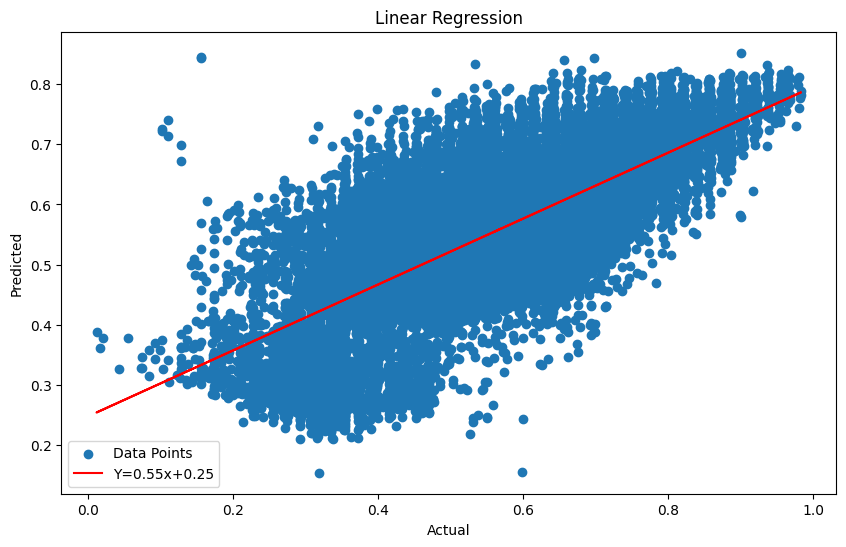

In [202]:
plot_data(y_test,y_pred,method='Linear Regression')